In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.utils import resample

from scipy.stats import chi2_contingency

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.columns = ['age', 'income', 'home_ownership',
       'employment_length', 'loan_intent', 'loan_grade', 'amount',
       'int_rate', 'loan_status', 'percent_income',
       'defaulter_history', 'cred_hist']

In [7]:
df.head()

,age,income,home_ownership,employment_length,loan_intent,loan_grade,amount,int_rate,loan_status,percent_income,defaulter_history,cred_hist
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
df.describe()

,age,income,employment_length,amount,int_rate,loan_status,percent_income,cred_hist
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
num_cols = [i for i in df.columns if df[i].dtype!="object"]
num_cols

['age',
 'income',
 'employment_length',
 'amount',
 'int_rate',
 'loan_status',
 'percent_income',
 'cred_hist']

In [10]:
cat_cols = [i for i in df.columns if df[i].dtype=="object"]
cat_cols

['home_ownership', 'loan_intent', 'loan_grade', 'defaulter_history']

In [11]:
for i in cat_cols:
    print(df[i].value_counts())
    print("="*30)

home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
defaulter_history
N    26836
Y     5745
Name: count, dtype: int64


In [12]:
df.isna().sum()

age                     0
income                  0
home_ownership          0
employment_length     895
loan_intent             0
loan_grade              0
amount                  0
int_rate             3116
loan_status             0
percent_income          0
defaulter_history       0
cred_hist               0
dtype: int64

<Axes: >

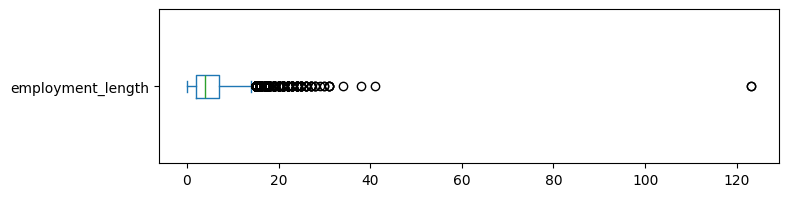

In [13]:
df["employment_length"].plot.box(vert=False, figsize=(8,2))

<Axes: >

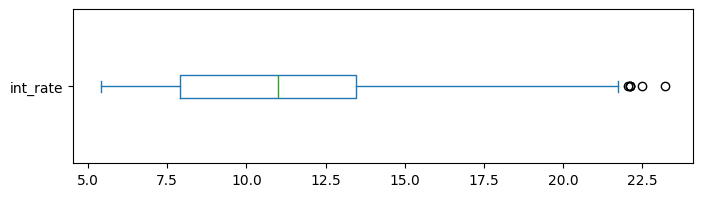

In [14]:
df["int_rate"].plot.box(vert=False, figsize=(8,2))

In [15]:
df[df["employment_length"] < 50]["employment_length"].mean()

np.float64(4.782224466607752)

In [16]:
df["int_rate"].fillna(df["int_rate"].mean(), inplace=True)

In [17]:
df["int_rate"].isna().sum()

np.int64(0)

In [18]:
df["employment_length"].fillna(4.78, inplace=True)

In [19]:
df.isna().sum()

age                  0
income               0
home_ownership       0
employment_length    0
loan_intent          0
loan_grade           0
amount               0
int_rate             0
loan_status          0
percent_income       0
defaulter_history    0
cred_hist            0
dtype: int64

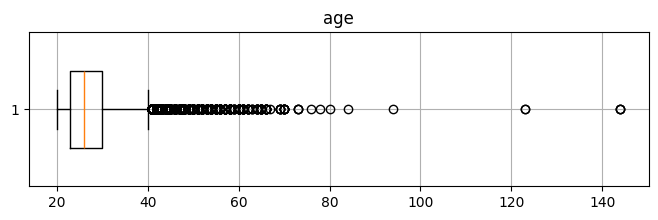

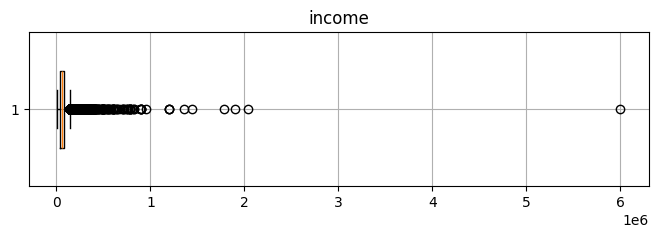

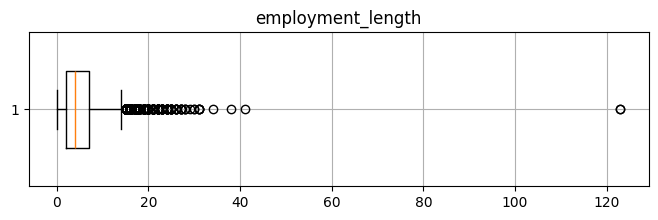

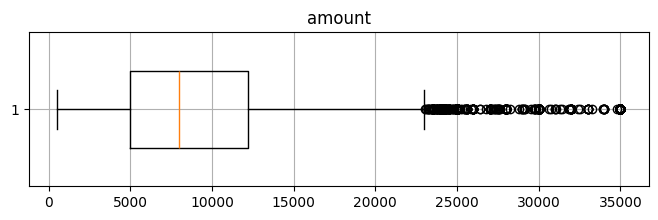

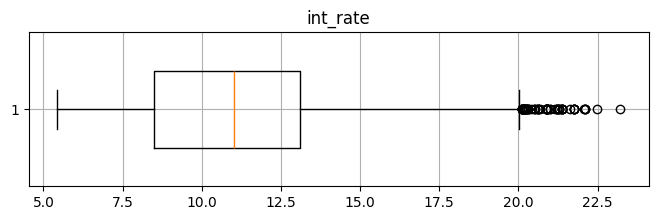

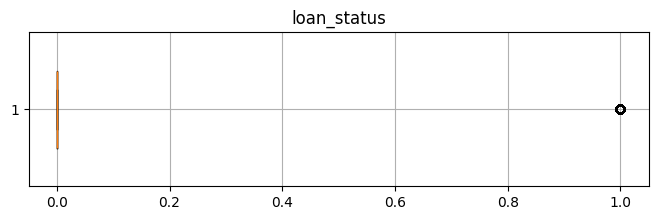

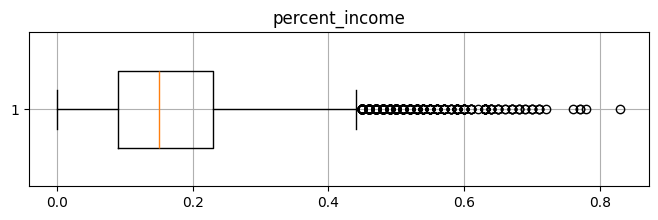

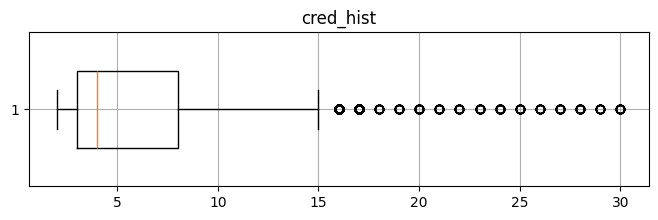

In [20]:
for i in num_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False, widths=0.5)
    plt.grid()
    plt.title(i)
    plt.show()

In [21]:
df["age"].quantile(0.97)

np.float64(43.0)

In [22]:
df = df[df["age"]<=43]

In [23]:
df["income"].quantile(0.99)

np.float64(225000.0)

In [24]:
df["income"].min(), df["income"].max()

(np.int64(4000), np.int64(2039784))

In [25]:
df = df[df["income"]<=225000]

In [26]:
df["employment_length"].quantile(0.995)

np.float64(19.0)

In [27]:
df = df[df["employment_length"]<=20]

In [28]:
df["percent_income"].quantile(0.995)

np.float64(0.53)

In [29]:
df = df[df["percent_income"]<= 0.53]

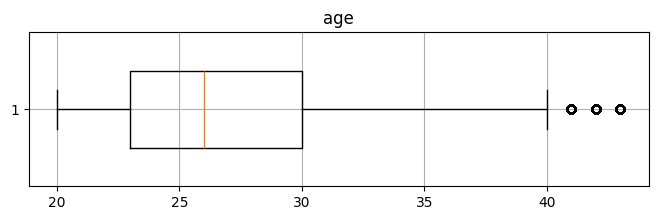

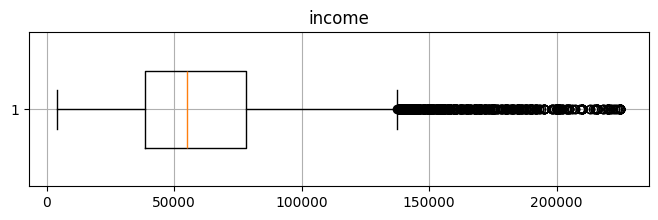

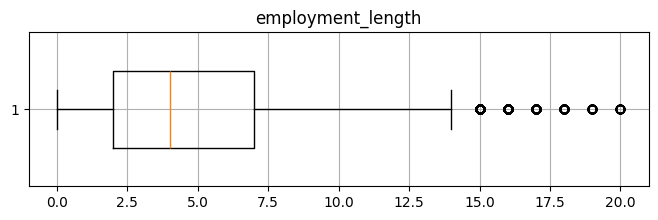

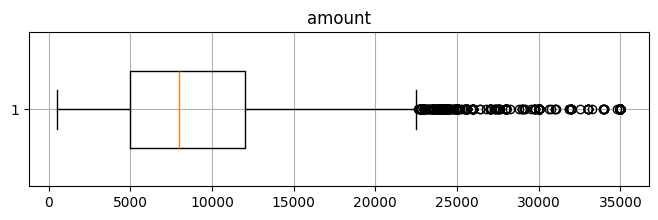

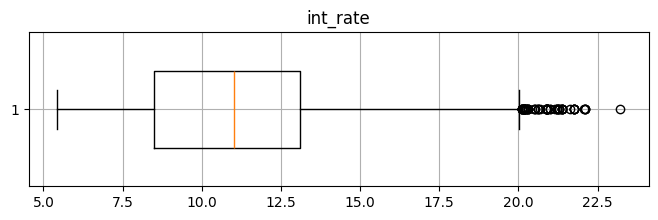

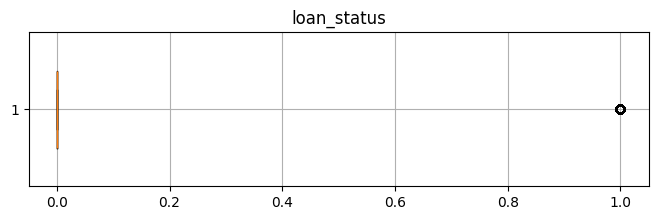

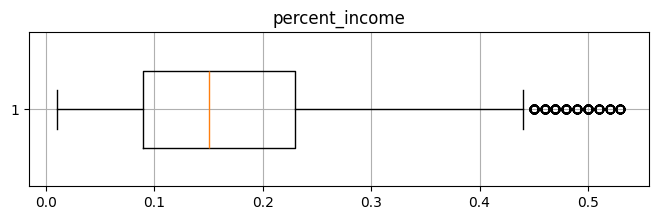

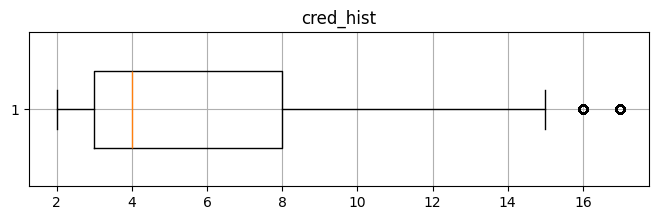

In [30]:
for i in num_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False, widths=0.5)
    plt.grid()
    plt.title(i)
    plt.show()

In [31]:
df.describe()

,age,income,employment_length,amount,int_rate,loan_status,percent_income,cred_hist
count,31166.000000,31166.000000,31166.000000,31166.000000,31166.000000,31166.00000,31166.000000,31166.000000
mean,27.027658,62673.223673,4.686262,9457.285985,11.000100,0.21655,0.169683,5.443849
std,4.881047,34230.224826,3.774900,6191.511280,3.080339,0.41190,0.102965,3.496331
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.00000,0.010000,2.000000
25%,23.000000,38400.000000,2.000000,5000.000000,8.490000,0.00000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,11.011695,0.00000,0.150000,4.000000
75%,30.000000,78000.000000,7.000000,12000.000000,13.110000,0.00000,0.230000,8.000000
max,43.000000,225000.000000,20.000000,35000.000000,23.220000,1.00000,0.530000,17.000000


In [32]:
home_and_loan = pd.crosstab(df["home_ownership"], df["loan_status"])
home_and_loan

loan_status,0,1
home_ownership,,
MORTGAGE,11170,1591
OTHER,66,31
OWN,2286,175
RENT,10895,4952


In [33]:
df["loan_status"].value_counts()

loan_status
0    24417
1     6749
Name: count, dtype: int64

In [34]:
stat_val, p_val, exp_val, deg_fr= chi2_contingency(home_and_loan)

In [35]:
alpha=0.05

In [36]:
if p_val > alpha:
    print("Accept the null Hypothesis : Loan status is dependent on home ownership")
else:
    print("Reject the null Hypothesis : Loan status is independent of home ownership")

Reject the null Hypothesis : Loan status is independent of home ownership


In [37]:
cat_cols

['home_ownership', 'loan_intent', 'loan_grade', 'defaulter_history']

In [38]:
stat_val, p_val, exp_val, deg_fr= chi2_contingency(pd.crosstab(df["loan_intent"], df["loan_status"]))
alpha = 0.05
if p_val > alpha:
    print("Accept the null Hypothesis : Loan status is dependent on loan intent")
else:
    print("Reject the null Hypothesis : Loan status is independent of loan intent")

Reject the null Hypothesis : Loan status is independent of loan intent


In [39]:
stat_val, p_val, exp_val, deg_fr= chi2_contingency(pd.crosstab(df["loan_grade"], df["loan_status"]))
alpha = 0.05
if p_val > alpha:
    print("Accept the null Hypothesis : Loan status is dependent on loan grade")
else:
    print("Reject the null Hypothesis : Loan status is independent of loan grade")

Reject the null Hypothesis : Loan status is independent of loan grade


In [40]:
stat_val, p_val, exp_val, deg_fr= chi2_contingency(pd.crosstab(df["defaulter_history"],
                                                               df["loan_status"]))
alpha = 0.05
if p_val > alpha:
    print("Accept the null Hypothesis : Loan status is dependent on defaulter history")
else:
    print("Reject the null Hypothesis : Loan status is independent of defaulter history")

Reject the null Hypothesis : Loan status is independent of defaulter history


In [41]:
ohe = OneHotEncoder(drop="first")

In [42]:
ohe.fit(df[cat_cols])

OneHotEncoder(drop='first')

In [43]:
ohe.get_feature_names_out()

array(['home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'defaulter_history_Y'], dtype=object)

In [44]:
encoded = pd.DataFrame(ohe.transform(df[cat_cols]).toarray(), columns=ohe.get_feature_names_out())

In [45]:
encoded

,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,defaulter_history_Y
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31162,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
new_df = df.drop(cat_cols, axis=1)

In [48]:
new_df = pd.concat([new_df, encoded], axis=1)

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31166 entries, 0 to 31165
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          31166 non-null  int64  
 1   income                       31166 non-null  int64  
 2   employment_length            31166 non-null  float64
 3   amount                       31166 non-null  int64  
 4   int_rate                     31166 non-null  float64
 5   loan_status                  31166 non-null  int64  
 6   percent_income               31166 non-null  float64
 7   cred_hist                    31166 non-null  int64  
 8   home_ownership_OTHER         31166 non-null  float64
 9   home_ownership_OWN           31166 non-null  float64
 10  home_ownership_RENT          31166 non-null  float64
 11  loan_intent_EDUCATION        31166 non-null  float64
 12  loan_intent_HOMEIMPROVEMENT  31166 non-null  float64
 13  loan_intent_MEDI

In [50]:
new_df.corr()["loan_status"]

age                           -0.026296
income                        -0.232071
employment_length             -0.086549
amount                         0.100781
int_rate                       0.320431
loan_status                    1.000000
percent_income                 0.372853
cred_hist                     -0.018572
home_ownership_OTHER           0.013978
home_ownership_OWN            -0.103390
home_ownership_RENT            0.236900
loan_intent_EDUCATION         -0.057786
loan_intent_HOMEIMPROVEMENT    0.039156
loan_intent_MEDICAL            0.055011
loan_intent_PERSONAL          -0.015606
loan_intent_VENTURE           -0.076820
loan_grade_B                  -0.094804
loan_grade_C                  -0.009224
loan_grade_D                   0.320811
loan_grade_E                   0.178252
loan_grade_F                   0.101895
loan_grade_G                   0.083173
defaulter_history_Y            0.178927
Name: loan_status, dtype: float64

In [51]:
new_df

,age,income,employment_length,amount,int_rate,loan_status,percent_income,cred_hist,home_ownership_OTHER,home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,defaulter_history_Y
0,21,9600,5.0,1000,11.14,0,0.10,2,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,21,9900,2.0,2500,7.14,1,0.25,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,77100,8.0,35000,12.42,1,0.45,3,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24,78956,5.0,35000,11.11,1,0.44,4,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31161,38,200000,0.0,3000,7.68,0,0.01,12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31162,38,110000,5.0,16000,11.99,0,0.15,13,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31163,36,92000,18.0,4000,7.29,0,0.04,13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31164,42,101000,6.0,25000,16.15,1,0.25,14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [52]:
scaler = StandardScaler()

In [53]:
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [54]:
new_df

,age,income,employment_length,amount,int_rate,loan_status,percent_income,cred_hist,home_ownership_OTHER,home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,defaulter_history_Y
0,-1.234931,-1.550503,0.083113,-1.365970,0.045418,-0.525743,-0.676772,-0.985005,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.825176,0.082583,-0.181799,4.125507,1.373215,1.902070,3.499454,-0.985005,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.234931,-1.541739,-0.711623,-1.123699,-1.253161,1.902070,0.780051,-0.985005,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.210544,0.421470,0.877849,4.125507,0.460963,1.902070,2.722481,-0.698987,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.620299,0.475692,0.083113,4.125507,0.035679,1.902070,2.625360,-0.412968,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31161,2.247985,4.011922,-1.241447,-1.042942,-1.077853,-0.525743,-1.550865,1.875182,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31162,2.247985,1.382624,0.083113,1.056740,0.321366,-0.525743,-0.191164,2.161201,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31163,1.838230,0.856765,3.526968,-0.881428,-1.204465,-0.525743,-1.259501,2.161201,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31164,3.067494,1.119694,0.348025,2.510367,1.671888,1.902070,0.780051,2.447219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [55]:
X = new_df.drop("loan_status", axis=1)
y = df["loan_status"]

In [56]:
X

,age,income,employment_length,amount,int_rate,percent_income,cred_hist,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,defaulter_history_Y
0,-1.234931,-1.550503,0.083113,-1.365970,0.045418,-0.676772,-0.985005,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.825176,0.082583,-0.181799,4.125507,1.373215,3.499454,-0.985005,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.234931,-1.541739,-0.711623,-1.123699,-1.253161,0.780051,-0.985005,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.210544,0.421470,0.877849,4.125507,0.460963,2.722481,-0.698987,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.620299,0.475692,0.083113,4.125507,0.035679,2.625360,-0.412968,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31161,2.247985,4.011922,-1.241447,-1.042942,-1.077853,-1.550865,1.875182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31162,2.247985,1.382624,0.083113,1.056740,0.321366,-0.191164,2.161201,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31163,1.838230,0.856765,3.526968,-0.881428,-1.204465,-1.259501,2.161201,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31164,3.067494,1.119694,0.348025,2.510367,1.671888,0.780051,2.447219,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [57]:
y

0        0
1        1
2        1
3        1
4        1
        ..
31161    0
31162    0
31163    0
31164    1
31165    1
Name: loan_status, Length: 31166, dtype: int64

In [58]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=345)

In [59]:
X_tr.shape

(23374, 22)

In [60]:
X_te.shape

(7792, 22)

In [61]:
model = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=5)

In [62]:
model.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

In [63]:
model.score(X_tr, y_tr)

0.9029691109780098

In [64]:
y_pr = model.predict(X_te)

In [65]:
accuracy_score(y_te, y_pr)

0.9034907597535934

In [66]:
df["loan_status"].value_counts()

loan_status
0    24417
1     6749
Name: count, dtype: int64

In [67]:
new_df["loan_status"] = df["loan_status"]

In [68]:
yes = new_df[new_df["loan_status"]==1]
no = new_df[new_df["loan_status"]==0]

In [69]:
len(yes)

6749

In [70]:
len(no)

24417

In [71]:
resampled_data = resample(yes, n_samples=len(no))

In [72]:
len(resampled_data)

24417

In [73]:
resampled_data["loan_status"]

12242    1
31068    1
13489    1
1158     1
12827    1
        ..
16839    1
23870    1
11969    1
10407    1
1275     1
Name: loan_status, Length: 24417, dtype: int64

In [74]:
sample = pd.concat([no, resampled_data], axis=0)

In [75]:
sample

,age,income,employment_length,amount,int_rate,loan_status,percent_income,cred_hist,home_ownership_OTHER,home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,defaulter_history_Y
0,-1.234931,-1.550503,0.083113,-1.365970,0.045418,0,-0.676772,-0.985005,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,-0.825176,1.528696,-0.711623,4.125507,-1.006431,0,1.265659,-0.412968,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,-0.825176,1.674768,-1.241447,4.125507,-1.006431,0,1.168537,-0.412968,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,-0.415421,2.916381,-0.711623,4.125507,-1.139536,0,0.488686,-0.412968,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,-0.415421,2.171413,1.142761,4.093204,1.873168,0,0.780051,-0.985005,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16839,-0.415421,-0.954529,-0.446711,0.410684,-1.626503,1,2.236874,-0.412968,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23870,0.199211,-0.241697,1.937496,1.379768,0.646011,1,1.071416,0.731107,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11969,-0.415421,-0.018207,0.612937,1.428223,-0.123397,1,0.780051,-0.698987,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10407,-1.030053,-0.925315,-0.446711,0.087656,2.733477,1,1.459902,-0.985005,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [76]:
sample["loan_status"].value_counts()

loan_status
0    24417
1    24417
Name: count, dtype: int64

In [77]:
new_df.corr()["loan_status"]

age                           -0.026296
income                        -0.232071
employment_length             -0.086549
amount                         0.100781
int_rate                       0.320431
loan_status                    1.000000
percent_income                 0.372853
cred_hist                     -0.018572
home_ownership_OTHER           0.013978
home_ownership_OWN            -0.103390
home_ownership_RENT            0.236900
loan_intent_EDUCATION         -0.057786
loan_intent_HOMEIMPROVEMENT    0.039156
loan_intent_MEDICAL            0.055011
loan_intent_PERSONAL          -0.015606
loan_intent_VENTURE           -0.076820
loan_grade_B                  -0.094804
loan_grade_C                  -0.009224
loan_grade_D                   0.320811
loan_grade_E                   0.178252
loan_grade_F                   0.101895
loan_grade_G                   0.083173
defaulter_history_Y            0.178927
Name: loan_status, dtype: float64

In [78]:
sample = sample.drop(["age", "employment_length", "cred_hist", "home_ownership_OTHER",
                       "loan_intent_EDUCATION", "loan_intent_HOMEIMPROVEMENT", "loan_intent_MEDICAL", 
                       "loan_intent_PERSONAL", "loan_intent_VENTURE", "loan_grade_B", 
                       "loan_grade_C", "loan_grade_G"], axis=1)

In [79]:
sample

,income,amount,int_rate,loan_status,percent_income,home_ownership_OWN,home_ownership_RENT,loan_grade_D,loan_grade_E,loan_grade_F,defaulter_history_Y
0,-1.550503,-1.365970,0.045418,0,-0.676772,1.0,0.0,0.0,0.0,0.0,0.0
11,1.528696,4.125507,-1.006431,0,1.265659,0.0,1.0,0.0,0.0,0.0,0.0
12,1.674768,4.125507,-1.006431,0,1.168537,0.0,1.0,0.0,0.0,0.0,0.0
16,2.916381,4.125507,-1.139536,0,0.488686,0.0,1.0,0.0,0.0,0.0,0.0
17,2.171413,4.093204,1.873168,0,0.780051,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
16839,-0.954529,0.410684,-1.626503,1,2.236874,0.0,0.0,0.0,0.0,0.0,0.0
23870,-0.241697,1.379768,0.646011,1,1.071416,0.0,0.0,0.0,0.0,0.0,1.0
11969,-0.018207,1.428223,-0.123397,1,0.780051,0.0,0.0,0.0,0.0,0.0,0.0
10407,-0.925315,0.087656,2.733477,1,1.459902,0.0,1.0,0.0,1.0,0.0,1.0


In [80]:
X1 = sample.drop("loan_status", axis=1)
y1 = sample["loan_status"]

In [81]:
X1

,income,amount,int_rate,percent_income,home_ownership_OWN,home_ownership_RENT,loan_grade_D,loan_grade_E,loan_grade_F,defaulter_history_Y
0,-1.550503,-1.365970,0.045418,-0.676772,1.0,0.0,0.0,0.0,0.0,0.0
11,1.528696,4.125507,-1.006431,1.265659,0.0,1.0,0.0,0.0,0.0,0.0
12,1.674768,4.125507,-1.006431,1.168537,0.0,1.0,0.0,0.0,0.0,0.0
16,2.916381,4.125507,-1.139536,0.488686,0.0,1.0,0.0,0.0,0.0,0.0
17,2.171413,4.093204,1.873168,0.780051,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
16839,-0.954529,0.410684,-1.626503,2.236874,0.0,0.0,0.0,0.0,0.0,0.0
23870,-0.241697,1.379768,0.646011,1.071416,0.0,0.0,0.0,0.0,0.0,1.0
11969,-0.018207,1.428223,-0.123397,0.780051,0.0,0.0,0.0,0.0,0.0,0.0
10407,-0.925315,0.087656,2.733477,1.459902,0.0,1.0,0.0,1.0,0.0,1.0


In [82]:
y1

0        0
11       0
12       0
16       0
17       0
        ..
16839    1
23870    1
11969    1
10407    1
1275     1
Name: loan_status, Length: 48834, dtype: int64

In [83]:
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X1, y1, test_size=0.25, random_state=234)

In [84]:
model2 = RandomForestClassifier(n_estimators=200, max_depth=7)

In [85]:
model2.fit(X_tr2, y_tr2)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [86]:
model2.score(X_tr2, y_tr2)

0.838580204778157

In [87]:
y_pr2 = model2.predict(X_te2)

In [88]:
accuracy_score(y_te2, y_pr2)

0.8381521828159555

In [89]:
kf = KFold(n_splits=10)
cvs = cross_val_score(estimator=RandomForestClassifier(n_estimators=200, max_depth=7), X=X_tr, y=y_tr,
                     n_jobs=-1, cv=kf, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.5s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.5s finished


In [90]:
cvs.mean()

np.float64(0.9189269910573132)

In [91]:
kf = KFold(n_splits=10)
cvs2 = cross_val_score(estimator=RandomForestClassifier(n_estimators=200, max_depth=7), 
                       X=X_tr2, y=y_tr2, n_jobs=-1, cv=kf, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.9s finished


In [92]:
cvs2.mean()

np.float64(0.8367235389900601)

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(X_tr, y_tr)

LogisticRegression()

In [95]:
lr.score(X_tr, y_tr)

0.8665183537263627

In [96]:
lr_pred = lr.predict(X_te)

In [97]:
accuracy_score(y_te, lr_pred)

0.8655030800821355

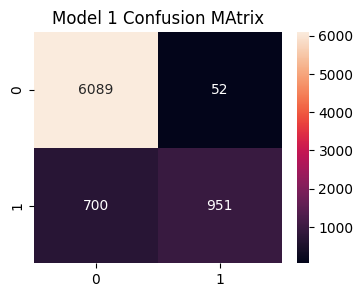

In [98]:
plt.figure(figsize=(4, 3))
plt.title("Model 1 Confusion MAtrix")
sns.heatmap(confusion_matrix(y_te, y_pr), annot=True, fmt="d")
plt.show()

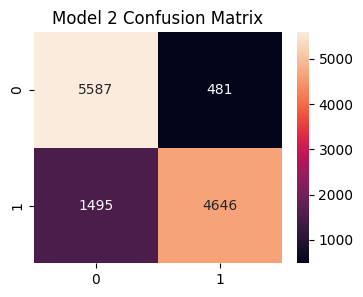

In [99]:
plt.figure(figsize=(4, 3))
plt.title("Model 2 Confusion Matrix")
sns.heatmap(confusion_matrix(y_te2, y_pr2), annot=True, fmt="d")
plt.show()

In [100]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6141
           1       0.95      0.58      0.72      1651

    accuracy                           0.90      7792
   macro avg       0.92      0.78      0.83      7792
weighted avg       0.91      0.90      0.89      7792



In [101]:
print(classification_report(y_te2, y_pr2))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      6068
           1       0.91      0.76      0.82      6141

    accuracy                           0.84     12209
   macro avg       0.85      0.84      0.84     12209
weighted avg       0.85      0.84      0.84     12209

